# Conectando com o banco de dados e importando bibliotecas

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Substitua os valores com as suas credenciais
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="0000",
  database="varejo"
)

print("Conexão bem sucedida!")


Conexão bem sucedida!


# Definindo a query a ser executada para a análise

In [2]:
def definir_cliente_mes(cliente, mes):

    query = f'''
        WITH esp_clientes AS (
        SELECT
            id_cliente,
            MIN(data_venda) AS primeira_compra
        FROM
            vendas
        WHERE
            YEAR(data_venda) = 2022
        GROUP BY
            id_cliente
        HAVING
            MONTH(primeira_compra) = {cliente} #VARIÁVEL CLIENTE
        ORDER BY
            id_cliente
        )
        SELECT 
        	v.id_cliente
        FROM
        	vendas v
        JOIN 
        	esp_clientes c ON v.id_cliente = c.id_cliente
        WHERE
        	YEAR(v.data_venda) = 2022 AND MONTH(v.data_venda) = {mes} #VARIÁVEL MÊS
        GROUP BY
        	v.id_cliente
        ORDER BY
        	v.id_cliente
        ;
    '''

    return query

# Executando as queries e guardando os resultados em um dicionário

In [5]:
cohort = {
    "Jan": [],
    "Fev": [],
    "Mar": [],
    "Abr": [],
    "Mai": [],
    "Jun": [],
    "Jul": [],
    "Ago": [],
    "Set": [],
    "Out": [],
    "Nov": [],
    "Dez": []
}

cursor = mydb.cursor()

for cliente in range(1,13):

    for mes in range(1,13):
        cursor.execute(definir_cliente_mes(cliente, mes))

        resultado = cursor.fetchall()

        if mes == 1:
            cohort["Jan"].append(len(resultado))
            
        elif mes == 2:
            cohort["Fev"].append(len(resultado))
            
        elif mes == 3:
            cohort["Mar"].append(len(resultado))
            
        elif mes == 4:
            cohort["Abr"].append(len(resultado))
            
        elif mes == 5:
            cohort["Mai"].append(len(resultado))
            
        elif mes == 6:
            cohort["Jun"].append(len(resultado))
            
        elif mes == 7:
            cohort["Jul"].append(len(resultado))
            
        elif mes == 8:
            cohort["Ago"].append(len(resultado))
            
        elif mes == 9:
            cohort["Set"].append(len(resultado))
            
        elif mes == 10:
            cohort["Out"].append(len(resultado))
            
        elif mes == 11:
            cohort["Nov"].append(len(resultado))
            
        elif mes == 12:
            cohort["Dez"].append(len(resultado))

In [6]:
for i in cohort:
    print(i, cohort[i])

Jan [7641, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Fev [179, 6733, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mar [191, 178, 7346, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Abr [187, 146, 190, 6874, 0, 0, 0, 0, 0, 0, 0, 0]
Mai [208, 180, 193, 175, 6858, 0, 0, 0, 0, 0, 0, 0]
Jun [195, 169, 178, 182, 161, 6523, 0, 0, 0, 0, 0, 0]
Jul [213, 191, 195, 174, 201, 163, 6589, 0, 0, 0, 0, 0]
Ago [188, 172, 189, 160, 196, 140, 166, 6439, 0, 0, 0, 0]
Set [182, 181, 172, 167, 170, 170, 161, 158, 6141, 0, 0, 0]
Out [180, 186, 196, 167, 153, 162, 183, 148, 170, 6175, 0, 0]
Nov [186, 158, 177, 154, 180, 166, 172, 165, 154, 140, 5744, 0]
Dez [226, 182, 161, 198, 168, 175, 169, 163, 155, 177, 136, 5996]


In [7]:
meses =  ["01/22", "02/22", "03/22", "04/22", "05/22", "06/22", "07/22", "08/22", "09/22", "10/22", "11/22", "12/22"]

df = pd.DataFrame(cohort, index=meses)

display(df)

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
01/22,7641,179,191,187,208,195,213,188,182,180,186,226
02/22,0,6733,178,146,180,169,191,172,181,186,158,182
03/22,0,0,7346,190,193,178,195,189,172,196,177,161
04/22,0,0,0,6874,175,182,174,160,167,167,154,198
05/22,0,0,0,0,6858,161,201,196,170,153,180,168
06/22,0,0,0,0,0,6523,163,140,170,162,166,175
07/22,0,0,0,0,0,0,6589,166,161,183,172,169
08/22,0,0,0,0,0,0,0,6439,158,148,165,163
09/22,0,0,0,0,0,0,0,0,6141,170,154,155
10/22,0,0,0,0,0,0,0,0,0,6175,140,177


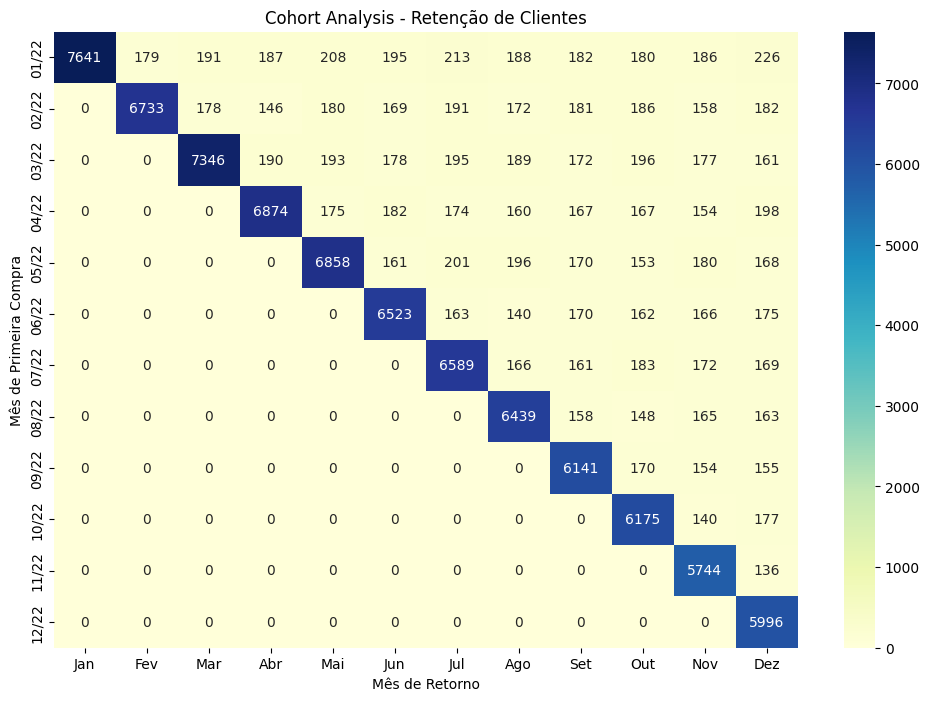

In [17]:
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Retenção de Clientes')
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel('Mês de Retorno')
plt.ylabel('Mês de Primeira Compra')
plt.show()

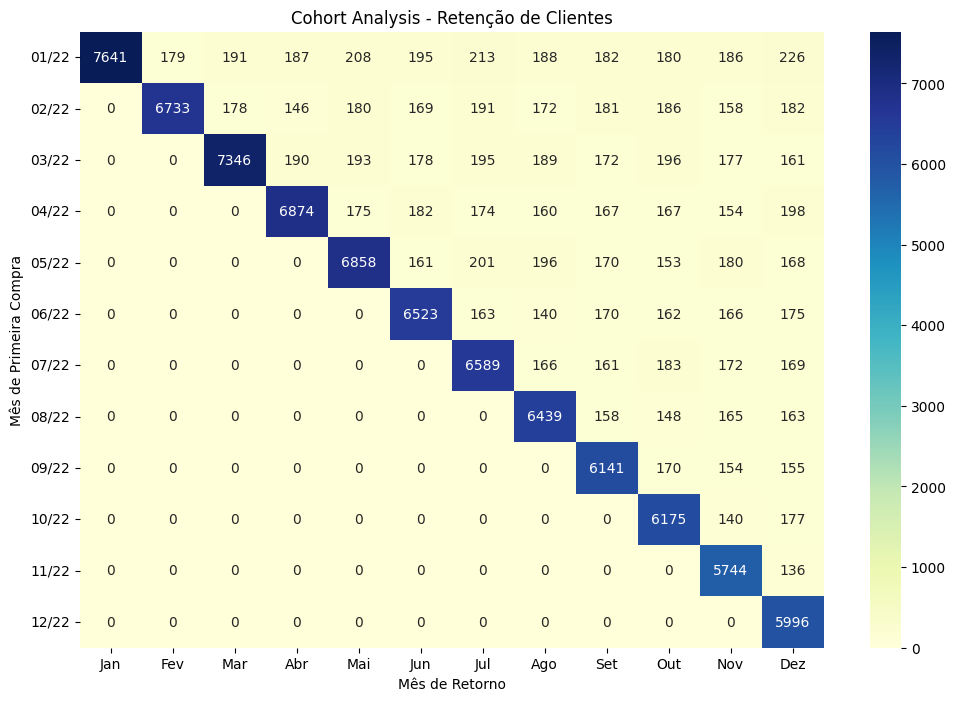

In [21]:
# Plotando o gráfico de coorte usando seaborn
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Retenção de Clientes')
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel('Mês de Retorno')
plt.ylabel('Mês de Primeira Compra')
plt.yticks(rotation=0)  # Rotaciona os rótulos do eixo x para horizontal

# Salvando o gráfico como um arquivo PNG
plt.savefig('cohort_analysis.png', format='png')

plt.show()